In [1]:
import audioflux as af
import numpy as np
import matplotlib.pyplot as plt

In [9]:
audio_arr, sample_rate = af.read('pipi.wav')

In [14]:
audio_arr[:100]

array([ 0.00067139,  0.00366211,  0.0062561 ,  0.00860596,  0.01023865,
        0.01029968,  0.00883484,  0.00657654,  0.00366211,  0.0002594 ,
       -0.00268555, -0.00489807, -0.00686646, -0.00837708, -0.00909424,
       -0.00917053, -0.00857544, -0.00682068, -0.00411987, -0.00120544,
        0.00202942,  0.0055542 ,  0.00828552,  0.00946045,  0.00968933,
        0.00958252,  0.0090332 ,  0.00791931,  0.0063324 ,  0.00418091,
        0.00163269, -0.00073242, -0.00292969, -0.00492859, -0.00613403,
       -0.00653076, -0.00708008, -0.00827026, -0.00920105, -0.00889587,
       -0.00730896, -0.00511169, -0.00358582, -0.00344849, -0.00341797,
       -0.00230408, -0.00065613,  0.00045776,  0.00086975,  0.00094604,
        0.00059509, -0.00016785, -0.00088501, -0.00120544, -0.00093079,
       -0.00050354, -0.00102234, -0.00285339, -0.00500488, -0.00636292,
       -0.00688171, -0.00697327, -0.00665283, -0.006073  , -0.00576782,
       -0.00541687, -0.00445557, -0.00318909, -0.00149536,  0.00

In [5]:
len(audio_arr)

11304300

In [6]:
audio_arr[1304300:1304400]

array([-1.0681152e-04, -1.0681152e-04, -1.2207031e-04, -1.2207031e-04,
       -1.2207031e-04, -1.0681152e-04, -1.2207031e-04, -1.2207031e-04,
       -1.2207031e-04, -1.0681152e-04, -1.0681152e-04, -1.2207031e-04,
       -1.2207031e-04, -1.0681152e-04, -1.0681152e-04, -1.2207031e-04,
       -1.2207031e-04, -1.0681152e-04, -1.0681152e-04, -1.0681152e-04,
       -1.0681152e-04, -1.0681152e-04, -1.0681152e-04, -1.2207031e-04,
       -1.2207031e-04, -1.0681152e-04, -1.0681152e-04, -1.0681152e-04,
       -1.2207031e-04, -1.0681152e-04, -1.0681152e-04, -1.0681152e-04,
       -1.0681152e-04, -1.0681152e-04, -1.0681152e-04, -1.0681152e-04,
       -1.0681152e-04, -1.0681152e-04, -9.1552734e-05, -9.1552734e-05,
       -1.0681152e-04, -1.0681152e-04, -9.1552734e-05, -9.1552734e-05,
       -9.1552734e-05, -9.1552734e-05, -9.1552734e-05, -9.1552734e-05,
       -9.1552734e-05, -7.6293945e-05, -9.1552734e-05, -9.1552734e-05,
       -7.6293945e-05, -6.1035156e-05, -7.6293945e-05, -6.1035156e-05,
      

In [10]:
%%time
spec_obj = af.MelSpectrogram(num=512,
                             samplate=sample_rate,
                             radix2_exp=12)
spec_arr = spec_obj.spectrogram(audio_arr)
spec_dB_arr = af.utils.power_to_db(spec_arr)

CPU times: total: 26.1 s
Wall time: 26.1 s


In [51]:
spec_obj.get_bin_band_length()

512

In [69]:
spec_obj.get_fre_band_arr()[15:55]

array([ 80.283295,  85.59634 ,  90.9455  ,  96.33115 , 101.753494,
       107.21274 , 112.70911 , 118.24294 , 123.8145  , 129.42393 ,
       135.0716  , 140.75772 , 146.4825  , 152.2463  , 158.04935 ,
       163.89194 , 169.77425 , 175.6967  , 181.65936 , 187.66267 ,
       193.70686 , 199.7923  , 205.9191  , 212.08755 , 218.29805 ,
       224.55087 , 230.84624 , 237.1845  , 243.5659  , 249.99078 ,
       256.45938 , 262.97205 , 269.52902 , 276.13065 , 282.77725 ,
       289.4691  , 296.20645 , 302.98984 , 309.81924 , 316.69525 ],
      dtype=float32)

In [42]:
spec_arr[16]

array([1.9258201e-07, 8.5653164e-07, 6.7945905e-07, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

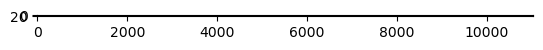

In [58]:
plt.imshow(spec_arr[15:40])

In [59]:
spec_arr.shape

(512, 11036)

In [80]:
def make_img(ims):
    new = []
    for row in ims:
        for i in range(20):
            new.append(row)
    return np.array(new)

In [83]:
new = make_img(spec_arr[::-1])

C:\Users\chomps\AppData\Local\Temp\ipykernel_2416\706520426.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec_arr[::-1]))#np.log(new)


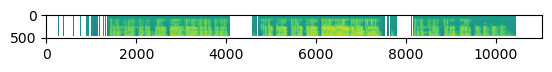

In [86]:
plt.imshow(np.log(spec_arr[::-1]))#np.log(new)

In [ ]:
plt.specgram(np.log(spec_arr[::-1]), Fs=512, cmap="rainbow")

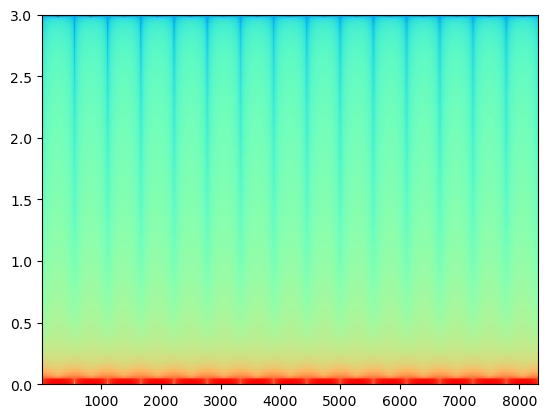

In [91]:
# the the generated signal.
Time_difference = 0.0001
 
# Generating an array of values
Time_Array = np.linspace(0, 5, int(np.ceil(5 / Time_difference)))
 
# Actual data array which needs to be plot
Data = 20*(np.sin(3 * np.pi * Time_Array))
 
# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(Data, Fs=6, cmap="rainbow");

In [93]:
Data.shape

(50000,)

<Axes: title={'center': 'MelSpectrogram'}, xlabel='Time'>

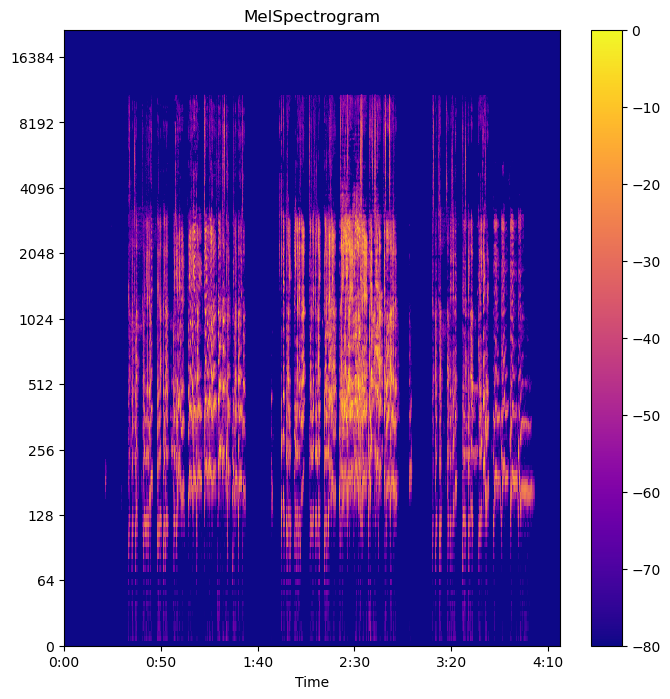

In [11]:
from audioflux.display import Plot
audio_len = audio_arr.shape[-1]
pt = Plot()
pt.add_spec_data(spec_dB_arr,
                 x_coords=spec_obj.x_coords(audio_len),
                 y_coords=spec_obj.y_coords(),
                 scale='log', title='MelSpectrogram')